# Support Vector Machine 

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.


### Linear SVM Classification

The two classes can clearly be separated easily with a straight line (they are linearly separable). The left plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it does not even separate the classes properly.

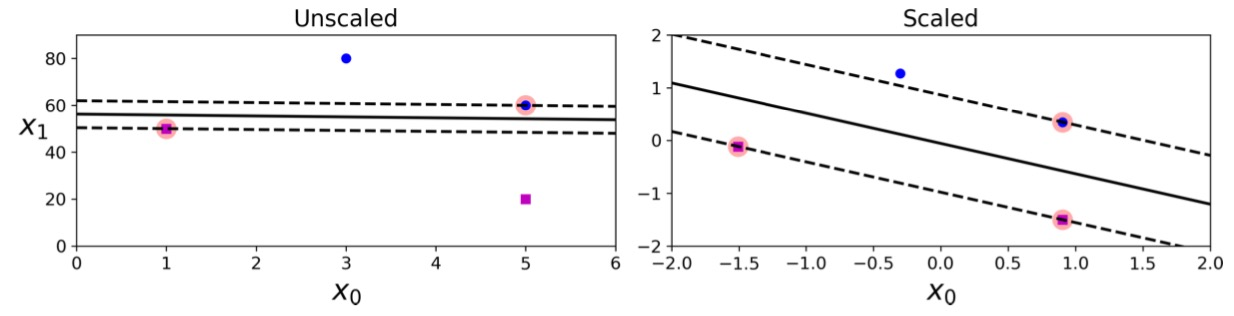

### Soft Margin Classification

There are two main issues with hard margin classification. First, it only works if the data is linearly separable, and second it is quite sensitive to outliers.

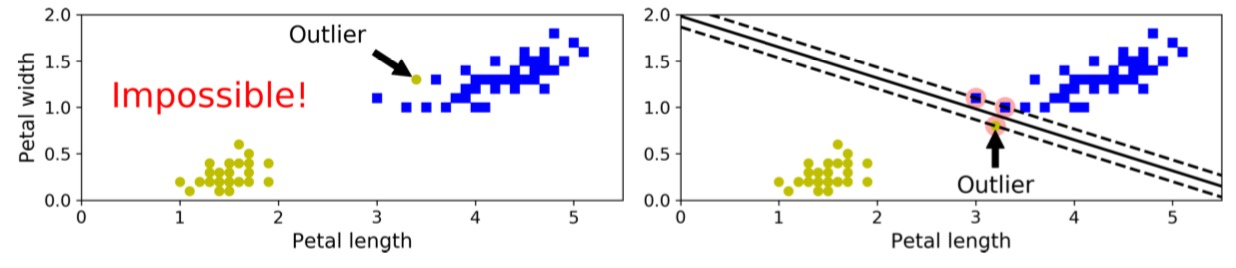


### Nonlinear SVM Classification

One approach to handling nonlinear datasets is to add more features, such as polynomial features.
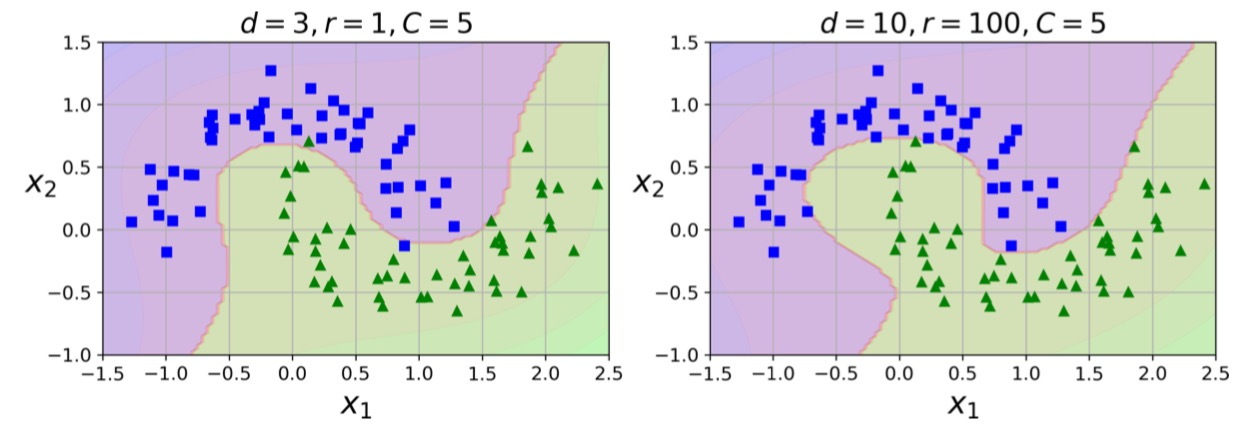


In [6]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
 
x=[[1,8],[3,20],[1,15],[3,35],[5,35],[4,40],[7,80],[6,49]]
y=[1,1,-1,-1,1,-1,-1,1]

clf=svm.SVC()  
clf.fit(x,y)

SVC()

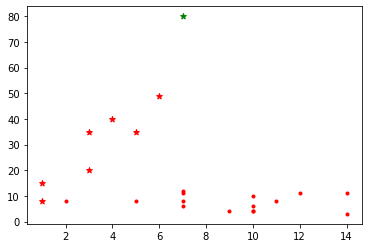

In [7]:
for i in x:
    res=clf.predict(np.array(i).reshape(1, -1))
    if res > 0:
        plt.scatter(i[0],i[1],c='r',marker='*')
    else :
        plt.scatter(i[0],i[1],c='g',marker='*')
rdm_arr = np.random.randint(1, 15, size=(15,2))

for i in rdm_arr:
    res=clf.predict(np.array(i).reshape(1, -1))
    if res > 0:
        plt.scatter(i[0],i[1],c='r',marker='.')
    else :
        plt.scatter(i[0],i[1],c='g',marker='.')

plt.show()


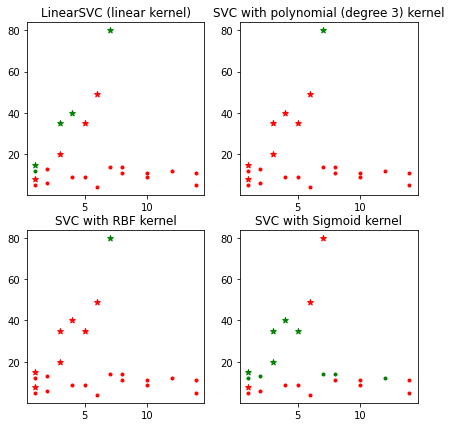

In [10]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,7))
ax0, ax1, ax2, ax3 = axes.flatten()
 
x=[[1,8],[3,20],[1,15],[3,35],[5,35],[4,40],[7,80],[6,49]]
y=[1,1,-1,-1,1,-1,-1,1]

titles = ['LinearSVC (linear kernel)',  
          'SVC with polynomial (degree 3) kernel',  
          'SVC with RBF kernel',      
          'SVC with Sigmoid kernel']
rdm_arr=np.random.randint(1, 15, size=(15,2))
 
def drawPoint(ax,clf,tn):
    for i in x:
        ax.set_title(titles[tn])
        res=clf.predict(np.array(i).reshape(1, -1))
        if res > 0:
           ax.scatter(i[0],i[1],c='r',marker='*')
        else :
           ax.scatter(i[0],i[1],c='g',marker='*')
    for i in rdm_arr:
        res=clf.predict(np.array(i).reshape(1, -1))
        if res > 0:
           ax.scatter(i[0],i[1],c='r',marker='.')
        else :
           ax.scatter(i[0],i[1],c='g',marker='.')

if __name__=="__main__":
    for n in range(0,4):
        if n==0:
            clf = svm.SVC(kernel='linear').fit(x, y)
            drawPoint(ax0,clf,0)
        elif n==1:
            clf = svm.SVC(kernel='poly', degree=3).fit(x, y)
            drawPoint(ax1,clf,1)
        elif n==2:
            clf= svm.SVC(kernel='rbf').fit(x, y)
            drawPoint(ax2,clf,2)
        else :
            clf= svm.SVC(kernel='sigmoid').fit(x, y)
            drawPoint(ax3,clf,3)
    plt.show()

/Users/lly/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


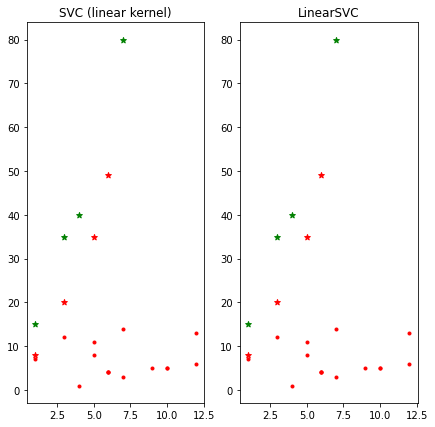

In [11]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(7,7))
ax0, ax1 = axes.flatten()
 
x=[[1,8],[3,20],[1,15],[3,35],[5,35],[4,40],[7,80],[6,49]]
y=[1,1,-1,-1,1,-1,-1,1]
 
titles = ['SVC (linear kernel)',  
          'LinearSVC']
 
rdm_arr=np.random.randint(1, 15, size=(15,2))
 
def drawPoint(ax,clf,tn):
    for i in x:
        ax.set_title(titles[tn])
        res=clf.predict(np.array(i).reshape(1, -1))
        if res > 0:
        ax.scatter(i[0],i[1],c='r',marker='*')
        else :
        ax.scatter(i[0],i[1],c='g',marker='*')
    for i in rdm_arr:
        res=clf.predict(np.array(i).reshape(1, -1))
        if res > 0:
        ax.scatter(i[0],i[1],c='r',marker='.')
        else :
        ax.scatter(i[0],i[1],c='g',marker='.')
if __name__=="__main__":
    for n in range(0,2):
        if n==0:
            clf = svm.SVC(kernel='linear').fit(x, y)
            drawPoint(ax0,clf,0)
        else :
            clf= svm.LinearSVC().fit(x, y)
            drawPoint(ax1,clf,1)
    plt.show()

### Linear SVM Coding: 


SVM model: Y = w0 + w1*x1 + w2*x2
intercept: w0=[-3.89974328]
coefficient: w1=[[0.72181271 0.34692337]]
accuracy：1.0000


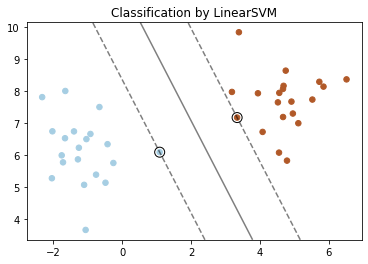

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=27)  
modelSVM = SVC(kernel='linear', C=100)  
modelSVM.fit(X, y)

print("\nSVM model: Y = w0 + w1*x1 + w2*x2")
print('intercept: w0={}'.format(modelSVM.intercept_)) 
print('coefficient: w1={}'.format(modelSVM.coef_)) 
print('accuracy：{:.4f}'.format(modelSVM.score(X, y)))  

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)  
ax = plt.gca()  
xlim = ax.get_xlim()  
ylim = ax.get_ylim()  
xx = np.linspace(xlim[0], xlim[1], 30)  
yy = np.linspace(ylim[0], ylim[1], 30)  
YY, XX = np.meshgrid(yy, xx)  
xy = np.vstack([XX.ravel(), YY.ravel()]).T  
Z = modelSVM.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  
ax.scatter(modelSVM.support_vectors_[:, 0], modelSVM.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')  
plt.title("Classification by LinearSVM")
plt.show()

### Nonlinear SVM Classification:

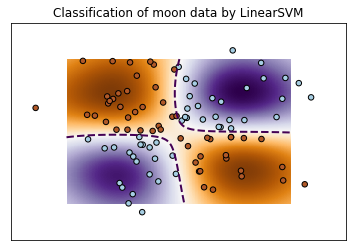

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))
np.random.seed(0)
X = np.random.randn(100, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Classification of moon data by LinearSVM")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()